<a href="https://colab.research.google.com/github/tidaltamu/workshops/blob/main/advanced/workshop2/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explaining Neural Networks

## Motivation
* Neural Networks are arguably the most powerful machine learning model we have today
* Are responsible for the recent hype and buzz around ML nowadays
* Are able to theoretically approximate any function

## Analagous to Biological Neural Networks

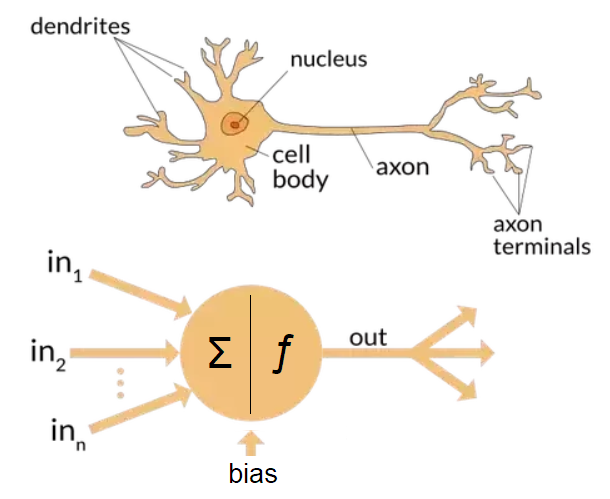

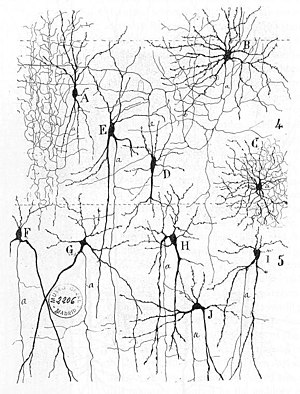

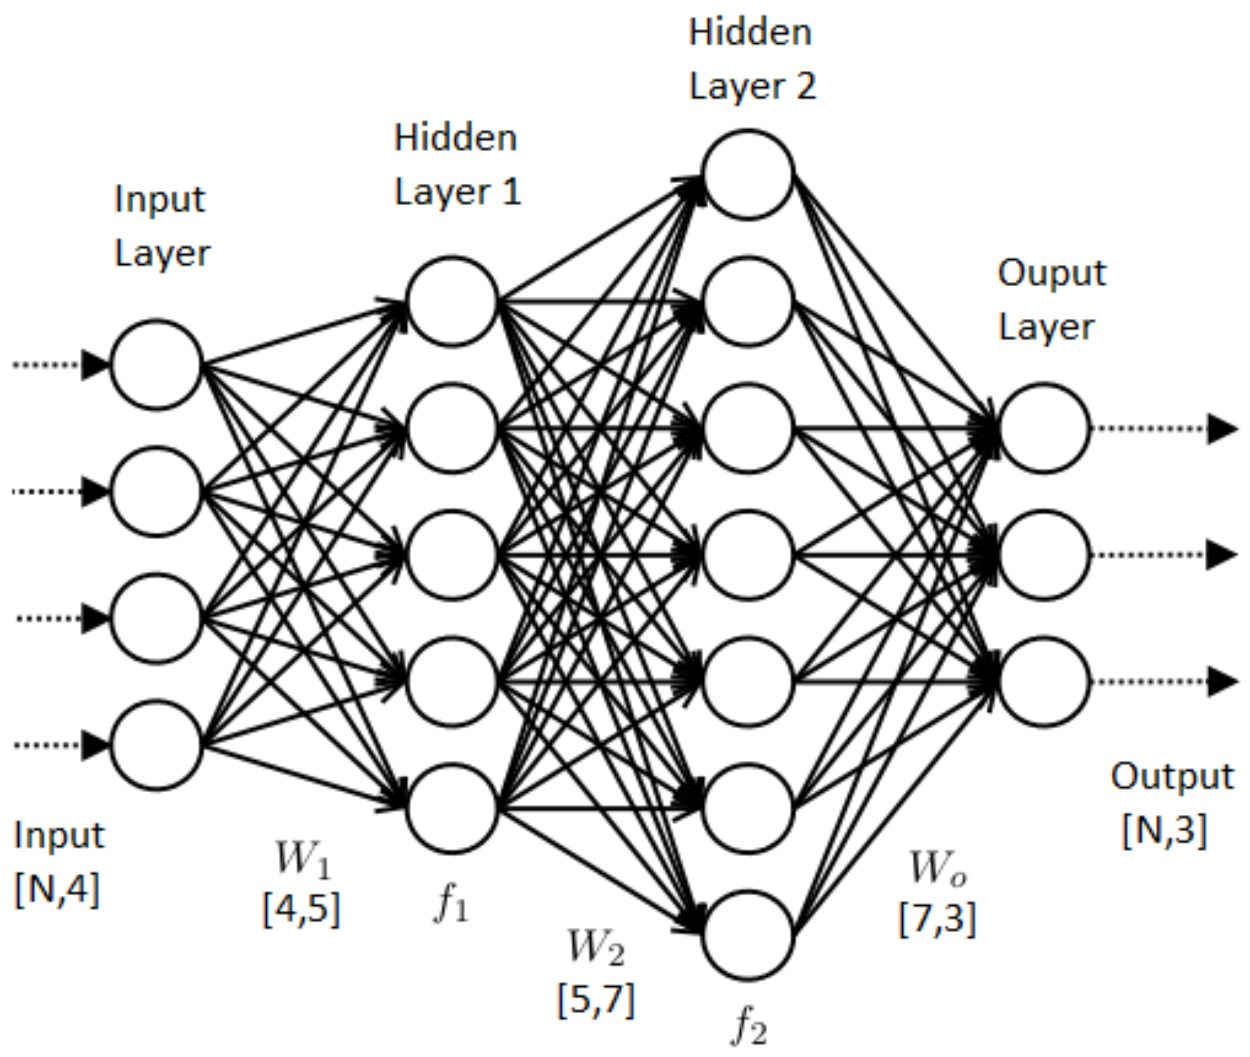

**Biological Neurons:**
* All-or-nothing response (flushing a toilet)
* Form connections with other neurons
* Information exchange via neurotransmitters
* Inputs via dendrites
* Outputs via axon terminals (synapses)




**Artificial Neurons (Perceptrons):**
* Inputs expressed as a linear combination
  * Like Linear Models
* Linear combination put through activation (step) function
  * Models the all-or-nothing response of neurons
* Connects to other perceptrons


## Math Behind Neural Networks


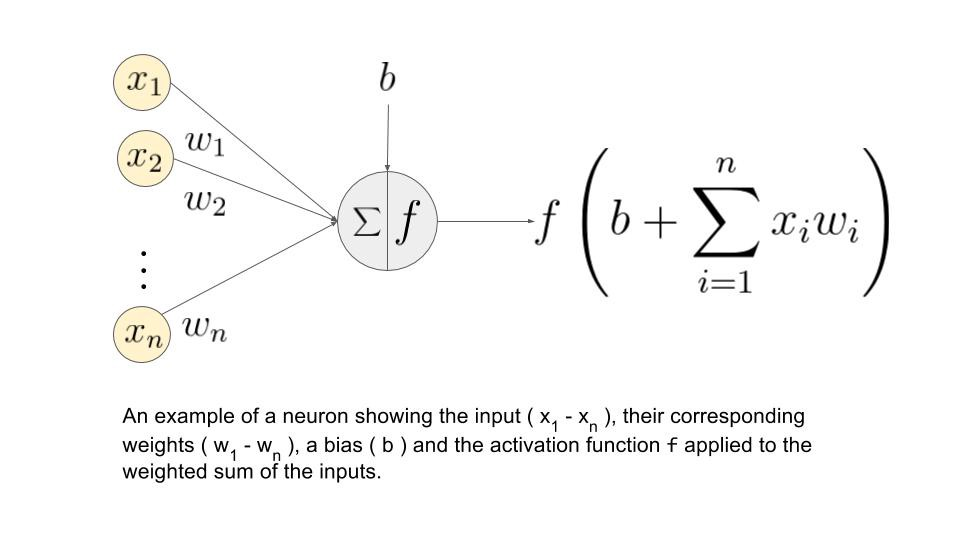

### Activation (Step) Functions

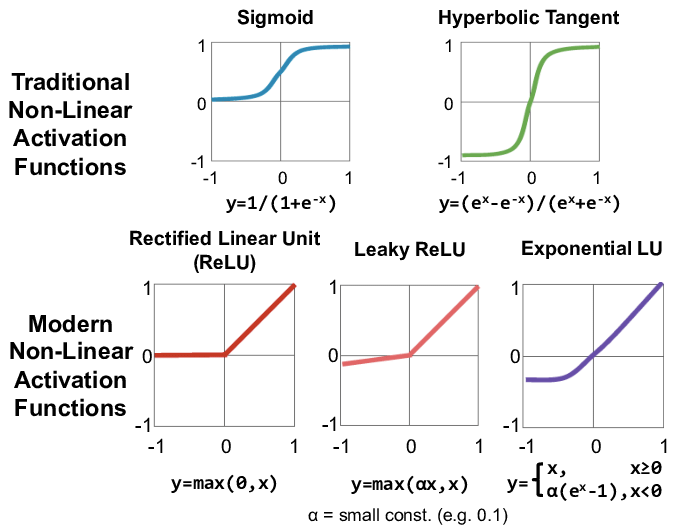

* Remember "All-or-Nothing" Response?
* Allow Neural Networks to become universal approximators
 * Otherwise, the outputs would just be universal approximators
 * See Tensorflow Playgrounds

## Backpropogation

**Further Exploration:**
* Great lecture series covering neural networks from a medium- and high-level
* https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

## Various Flavors of Neural Networks

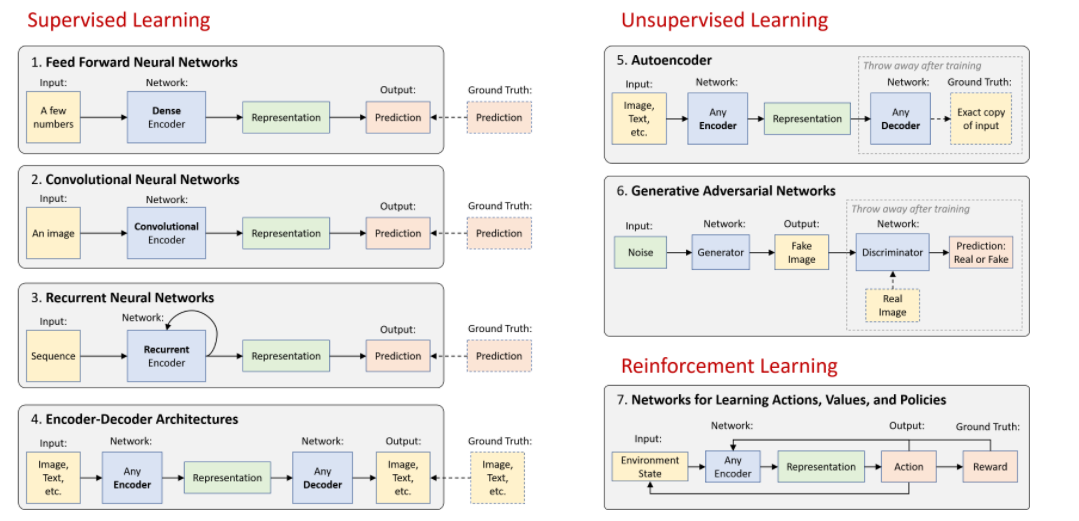

We'll be focusing on Feed Forward Neural Networks today. These are sometimes simply referred to as Neural Networks. We will be covering Convolutional (CNNs) and Recurrent Neural Networks (RNNs) in future lectures. 

Image Source: https://colab.research.google.com/drive/1_g2wLgVSyQjZiDqKaXYKyY7gVWLjbxvM?usp=sharing#scrollTo=TavSDM-SQWl3

# Tensorflow Playground:
[playground.tensorflow.com](https://playground.tensorflow.com)

2 Main Choices for Building Neural Networks:
* Tensorflow (Keras)
* PyTorch

Note: If installing tensorflow locally, may take a while to install. May be multiple versions as well for GPU processing.

In [1]:
import tensorflow as tf
from tensorflow import keras

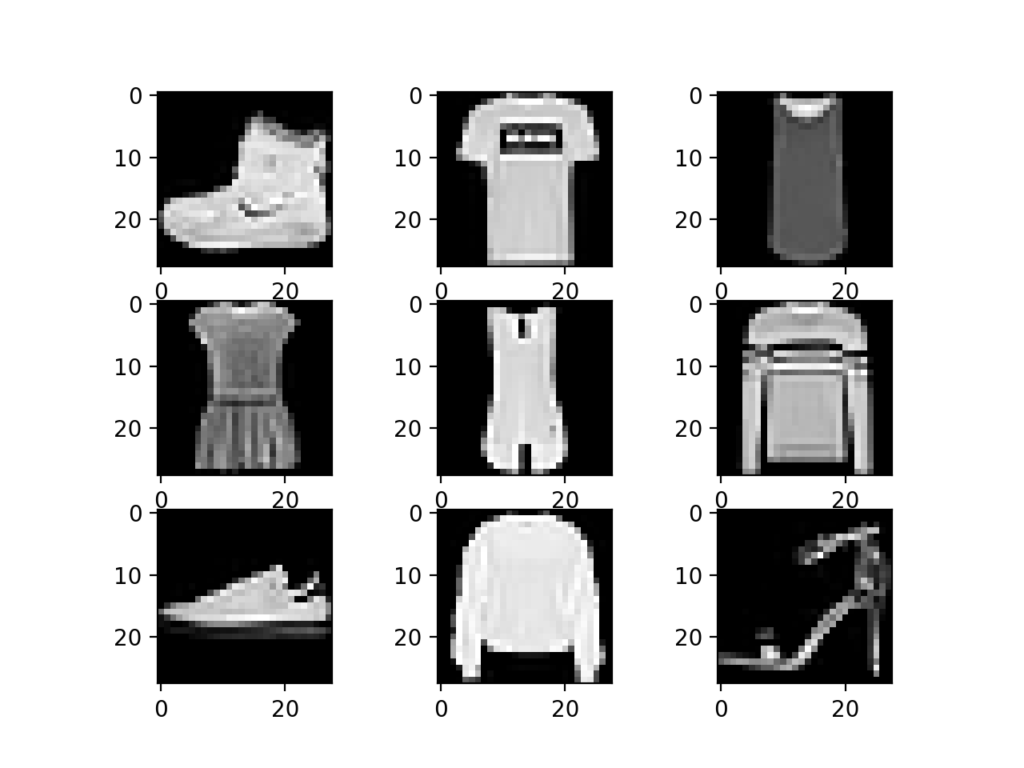

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [4]:
X_train_full.shape

(60000, 28, 28)

### Scaling values to optimize gradient descent

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [6]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

### Adding label names

In [8]:
class_names = ["T-shirt/ top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names

['T-shirt/ top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
class_names[y_train[0]]

'Coat'

# Building Our Model

Activation Functions
* RELU
* Softmax \\

For more info on Keras activation functions:
https://keras.io/api/layers/activations/

In [11]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

This model:
 * Takes a 28 x 28 image as input
 * Has a hidden layer of "300" nodes
 * Has a second hidden layer of 100 nodes
 * Outputs into 10 classes, giving the model's prediction probability

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


We can access our layers, too.

In [13]:
model.layers

In [14]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [15]:
weights.shape

(784, 300)

Notice that these are all randomly initialized before we have trained the model!

In [16]:
weights[0, :]

array([-1.3302982e-02, -4.6328809e-02,  2.9277623e-02,  1.4293306e-02,
        5.9359074e-02,  3.8187183e-02,  2.1420389e-02, -3.5540894e-02,
        6.7373902e-02, -6.8720810e-02,  7.1209744e-02, -2.7580891e-02,
        5.8287442e-02,  2.0207673e-02,  6.3785300e-02, -6.9824599e-02,
        2.1155782e-02,  3.7539102e-02, -2.4462134e-02, -1.4370855e-02,
        6.3956156e-03, -5.6606308e-03,  3.9710388e-02,  4.9569532e-02,
       -3.2713730e-02, -5.7915635e-02,  7.0381552e-02, -3.8503185e-03,
        3.4811690e-02, -1.6223256e-02, -2.3796272e-02,  2.2389941e-02,
        3.6138907e-02, -4.3747898e-02, -1.2051258e-02, -4.5135282e-02,
       -8.1427768e-03,  1.3625473e-03, -3.2876171e-02,  7.2792605e-02,
        2.6786692e-02,  3.7105002e-02,  5.2355617e-02, -4.9285367e-03,
        2.5346681e-02,  2.6041918e-02, -2.0468738e-02, -6.3277699e-02,
       -3.9890572e-02, -6.6067532e-02, -6.1007041e-02, -4.2081408e-02,
        1.6895078e-02,  7.3482513e-02, -6.1587390e-02, -2.2567321e-02,
      

In [17]:
biases.shape

(300,)

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Compiling the Model

In [19]:
# learning rate default 0.01
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])

# Training the Model

Quick Poll: How do you pronounce "epoch"?

In [20]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9950 - accuracy: 0.6858 - val_loss: 0.5363 - val_accuracy: 0.8170
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5083 - accuracy: 0.8216 - val_loss: 0.4390 - val_accuracy: 0.8518
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4538 - accuracy: 0.8426 - val_loss: 0.4159 - val_accuracy: 0.8558
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4283 - accuracy: 0.8516 - val_loss: 0.4208 - val_accuracy: 0.8598
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3977 - accuracy: 0.8603 - val_loss: 0.3795 - val_accuracy: 0.8674
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3811 - accuracy: 0.8640 - val_loss: 0.3819 - val_accuracy: 0.8660
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3706 - accuracy: 0.8703 - val_loss: 0.3556 - val_accuracy:

In [21]:
# Code options to consider:
# model.fit(validation_split=0.1)
# model.fit(class_weight=)
# EarlyStopping callbacks

In [22]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.727196,0.761164,0.536296,0.8170
1,0.492512,0.827800,0.438988,0.8518
2,0.445707,0.844091,0.415869,0.8558
3,0.418494,0.853255,0.420789,0.8598
4,0.396718,0.860218,0.379546,0.8674
5,0.381474,0.865382,0.381922,0.8660
6,0.367988,0.870564,0.355647,0.8756
7,0.355872,0.874927,0.358487,0.8738
8,0.345369,0.877236,0.345493,0.8764
9,0.335319,0.881855,0.339392,0.8818


**Important Note**: Training error is computed as a running mean during the epoch. Validation error is computed at the end of the epoch.

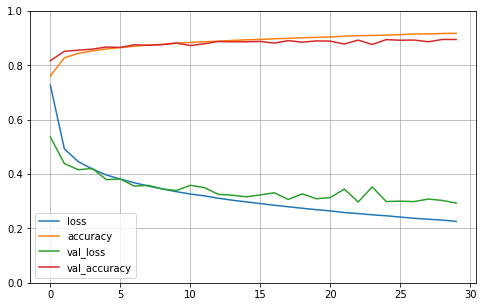

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Evaluating Our Model

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3257 - accuracy: 0.8840


[0.3256944715976715, 0.8840000033378601]

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [27]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U12')

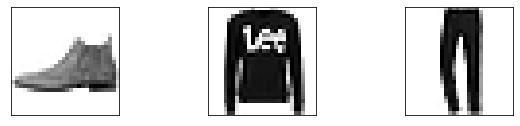

In [28]:
plt.figure(figsize=(10,2))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    #plt.xlabel(X_test[i])

**Further Exploration for Training NNs**
* Hyperparameter Tuning
  * Cross-Validation
  * Learning Rates
  * Number of Layers
  * Number of Nodes Per Layer
  * Various Architectures
  * Choosing Step Functions



**Closing**:
* What would you like to get out of these workshops?
 * More practice, less theory?
* Do you enjoy the lectures? Do you feel like you are learning anything? Are they entertaining?
* What topics would you like to go over?
 * How to train your models?
 * Live coding sessions


